![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

Asignatura: Introducción a Data Science

Profesor: Juan Bekios Calfa

---


# Laboratorio Número 5.2: Clasificación Lineal

**Alumno:**

* *Nombre y apellido alumno*

**Objetivo:** 


*   Analizar los datos entregados para el laboratorio.
*   Implementar el método de clasificación lineal utilizando el método de descenso del gradiente.
*   Implementar el método de clasificación lineal utilizando las librerías sklearn.
*   Comparar los resultados.


## Analizar los datos entregados para el laboratorio

### Cargar los datos

En el ejemplo se hace una carga utilizando *Google Drive*:

1.   Hacer click en la pestaña **Files** del panel de la izquierdo.
2.   Hacer click en ***Mount Drive***.
3.   Ir a la url indicada en *Go to this URL in a browser*.
4.   Copiar código de acceso y agregarlo a *Enter your authorization code*.
5.   Establecer la conexión con Pandas.

También se puede subir el archivo utilizando la opción *Upload* del panel izquierdo.

El laboratorio tiene como objetivo aplicar difentes técnicas de clasificación lineal sobre el conjunto de datos que relacionas atributos de células con células potencialmente cancerígenas.

**Se pide:**

1. Cargar lo datos por medio de un DataFrame.
2. Mostrar gráfico que muestre la relación de dos atributos de la célula y su etiqueta de célula cancerígena o no.
3. Mostrar un gráfico que divida las clases positivas y negativas (cáncer o no cancer) utilizando una linea recta.  

## Cargar las librerías del laboratorio


In [1]:
### PREAMBLE
# Classification
# classification.svg

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Cargar la base de datos utilizando las librerías sklearn

Para el laboratorio número 6 utilizaremos las librerías de sklearn para cargar los datos asociados a los atributos de la célula (dimensión, tamaño, textura, etc.) y la etiqueta asociada a cada una de las observaciones o ejemplos.

In [8]:
import numpy as np
import sklearn.datasets
dat = sklearn.datasets.load_breast_cancer()

(array([3]),)


## Graficar los datos

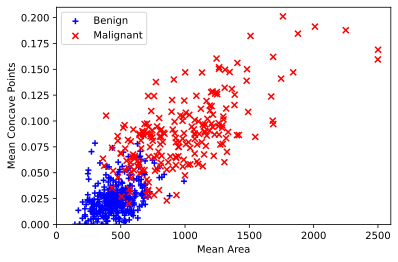

In [4]:
ix = np.where(dat["feature_names"] == "mean area")[0][0]
iy = np.where(dat["feature_names"] == "mean concave points")[0][0]
labels = dat['target']
labels_benign = labels == 1

attr1_benign = dat['data'][labels_benign, ix]
attr2_benign = dat['data'][labels_benign, iy]

labels_no_benign = labels == 0

attr1_no_benign = dat['data'][labels_no_benign, ix]
attr2_no_benign = dat['data'][labels_no_benign, iy]

def plot_cells():    
    plt.scatter(attr1_benign, attr2_benign, marker='+', c='blue')
    plt.scatter(attr1_no_benign, attr2_no_benign, marker='x', c='red')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend(['Benign', 'Malignant'])
plot_cells()

## Separar el conjunto de datos por medio de una recta

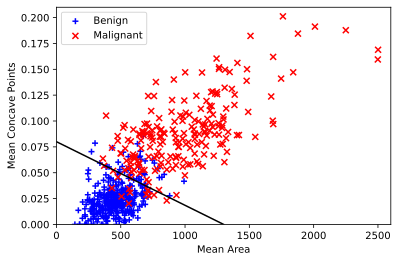

In [10]:
plot_cells()
plt.plot([0, 1300], [0.08,0], 'k-')

## Notación para clasificación lineal

Si desean recordar los elementos básicos de regresión lineal pueden revisar el siguiente [link](http://www.datasciencecourse.org/notes/ml_intro/#machine-learning-in-general).

- **Inputs (features):** $x^{(i)} \in \mathbb{R}^n, \; i=1,\ldots, m$
- **Outputs:** $y^{(i)} \in \mathcal{Y}, \; i=1,\ldots,m$
- **Parameters:** $\theta \in \mathbb{R}^d$.
- **Hypothesis function:** $h_\theta : \mathbb{R}^n \rightarrow \hat{\mathcal{Y}}$
- **Loss function:** $\ell : \hat{\mathcal{Y}} \times \mathcal{Y} \rightarrow \mathbb{R}_+$
- **Canonical optimization problem:**
\begin{equation}
\DeclareMathOperator*{\minimize}{minimize}
\minimize_\theta \frac{1}{m}\sum_{i=1}^m \ell(h_\theta(x^{(i)}),y^{(i)})
\end{equation}


### Zero-one loss

Conocida como la función de pérdida zero-one $\ell_{0/1} : \mathbb{R} \times \{-1,+1\} \rightarrow \mathbb{R}_+$, que se escribe como sigue:

\begin{equation}
\begin{split}
\ell_{0/1}(h_\theta(x), y) & = \left \{ \begin{array}{ll} 0 & \mbox{ if } \mathrm{sign}(h_\theta(x)) = y \\
1 & \mbox{ otherwise } \end{array} \right . \\
& = \mathrm{1}\{h_\theta(x)\cdot y \leq 0\}.
\end{split}
\end{equation}

Text(0.5, 0, '$h_θ(x) \\cdot y$')

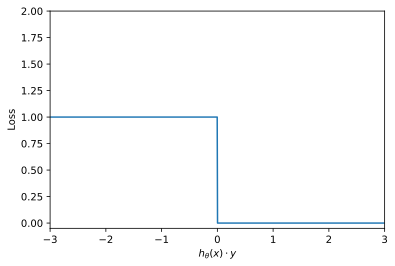

In [11]:
hy = np.linspace(-3,3,1000)
plt.plot(hy,(hy<=0))
plt.xlim([-3,3])
plt.ylim([-0.05, 2])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")

### Funciones de pérdida alternativas

Dado lo complicado que es minimizar la suma de la pérdida zero-one, usualmente se utilizan otras alternativas de funciones de pérdida para clasificación. Hay muchos tipos, y diferentes elecciones conducen a diferentes algoritimos de aprendizaje automático. A continuación se listan algunos de estos algoritmos:

- **Logistic loss:** $\ell_{\mathrm{logistic}}(h_\theta(x), y) = \log(1+\exp(-h_\theta(x) \cdot y))$  <br/> Para valores grandes  $h_\theta(x) \cdot y$, $\exp(-h_\theta(x) \cdot y)$ será muy cercano a cero; para valores negativos muy grandes $\log(1+\exp(-h_\theta(x) \cdot y)) \approx -h_\theta(x) \cdot y$ la pérdida tendrá un incremento casi lineal.
- **Hinge loss:** $\ell_{\mathrm{hinge}}(h_\theta(x), y) = \max\{1 - h_\theta(x) \cdot y, 0\}$ <br/>  Mientras sea $h_\theta(x) \cdot y \geq 1$, la pérdida será cero, en caso contrario esta incrementará negativamente y linealmente $h_\theta(x) \cdot y \geq 1$.
- **Exponential loss:** $\ell_{\mathrm{exp}}(h_\theta(x), y) = \exp(-h_\theta(x) \cdot y)$ <br/> Similar al la regresión logística, la pérdida será cero para grandes $h_\theta(x) \cdot y$; y para negativas $h_\theta(x) \cdot y$ la pérdida incrementará rápidamente.

### Graficar cada una de las funciones de pérdida

Utilizando la información anterior graficar todas las curvas de pérdida aprendidas hasta ahora.

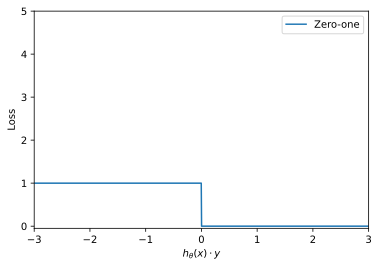

In [12]:
hy = np.linspace(-3,3,1000)
plt.plot(hy,(hy<=0))
# --- escribir codigo ---
# --- escribir codigo ---
# --- escribir codigo ---
plt.xlim([-3,3])
plt.ylim([-0.05, 5])
plt.ylabel("Loss")
plt.xlabel("$h_θ(x) \cdot y$")
plt.legend(['Zero-one', 'Logistic', 'Hinge', 'Exponential'])

## Máquina de Soporte Vectorial (Suppor Vector Machine)

Esta expresión define la función de pérdida a minimizar:

\begin{equation}
\minimize_{\theta} \frac{1}{m} \sum_{i=1}^m \max \{1-\theta^T x^{(i)} \cdot y^{(i)}, 0\} + \lambda \sum_{j=1}^n \theta_j^2
\end{equation}

donde $\lambda \in \mathbb{R}_+$ es llamado un _parámetro de regularización_ que define la compensación entre la pérdida y mantener los valores de los parámetros $\theta$ pequeños.

Así, la derivada parcial de la pérdida está dada por
\begin{equation}
\frac{\partial}{\partial \theta_j} \max \{1-\theta^T x \cdot y, 0\} = -x_j y 1\{\theta^T x \cdot y \leq 1\},
\end{equation}
el gradiente de los términos de regularización
\begin{equation}
\frac{\partial}{\partial \theta_j}\lambda \sum_{k=1}^n \theta_k^2 = 2\lambda \theta_j
\end{equation}
y el grandiente de toda la función objetivo es
\begin{equation}
\begin{split}
\nabla_\theta E(\theta) & = 
\nabla_\theta \left (\frac{1}{m} \sum_{i=1}^m \max \{1-\theta^T x^{(i)} \cdot y^{(i)}, 0\} +\lambda \sum_{k=1}^n \theta_k^2\right ) \\ &
= \frac{1}{m} \sum_{i=1}^m -x^{(i)} y^{(i)} 1\{\theta^T x^{(i)} \cdot y^{(i)} \leq 1\} + 2\lambda \theta.
\end{split}
\end{equation}

Podemos escribir es gradiente de forma más eficiente en un formato matricial, tal como
\begin{equation}
\nabla_\theta E(\theta) = -\frac{1}{m}X^T Y 1\{Y X\theta \leq 1\} + 2 \lambda \theta
\end{equation}
y donde $Y = \mathrm{diag}(y)$  es una matriz diagonal hecha de los elementos de $y$.

In [13]:
def svm_gd(X, y, alpha, iters, lam):
    m,n = X.shape
    theta = np.zeros(n)
    YX = X * y[:,None]
    loss, err = np.zeros(iters), np.zeros(iters)
    for t in range(iters):
        hy = YX @ theta
        loss[t] = np.maximum(1-hy,0).mean()
        err[t] = (hy <= 0).mean() # Tasa de acierto
        theta -= alpha * (-YX.T @ (YX @ theta <= 1)/m + 2*lam*theta)
    return theta, loss, err

**Pregunta para el alumno:** Explique el funcionamiento de la linea 10. Explíquelo con un ejemplo.

$$
X=
\begin{bmatrix}
2 & 3 & 4 &  \\
5 & 6 & 7 &  \\
1 & 1 & 1 & 
\end{bmatrix}
$$

$$
y =
\begin{bmatrix}
1 & 0 & 1 & 
\end{bmatrix}
$$

**Respuesta del alumno**:

...

...

...

Normalizamos los datos

In [14]:
def normalize_data(X, normalize_cols):
    """ Normalize specified columns of X to range [0,1] in place. """
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    return min_X, max_X

def unnormalize_theta(theta, normalize_cols, ranges):
    theta[normalize_cols] /= (ranges[1] - ranges[0])
    theta[-1] -= theta[normalize_cols] @ ranges[0]
    return theta

El siguiente código crea la matrices y los vectores  $X$ e $y$ de los datos normalizados, ejecutamos el descenso del gradiente para SVM (para 1000 iteraciones, con una regularización $\lambda = 0.001$, y tamaño de salto $\alpha = 1$), para luego desnormalizar el vector  $\theta$ resultante para volver a la representación de las coordenadas originales (no normalizadas).

In [ ]:
# Preparar los datos y calcular los parámetros
X0 = np.asarray([dat["data"][:,ix], dat["data"][:,iy], np.ones(dat["data"].shape[0])]).T
y0 = (1.*(dat["target"]==np.where(dat["target_names"] == "malignant")[0][0]) +
     -1.*(dat["target"]==np.where(dat["target_names"] == "benign")[0][0]))

X, y = X0.copy(), y0.copy()
ranges = normalize_data(X, [True, True, False])
theta, loss, err = svm_gd(X,y, 1.0, 1000, 1e-3)
unnormalize_theta(theta, [True, True, False], ranges)

Primero visualicemos cómo es esta clasificación. Observe que aquí estamos usando las funciones de contorno para dibujar las regiones positivas y negativas; para un clasificador lineal simple hay formas más fáciles, pero el enfoque aquí también funcionará para clasificadores no lineales con las modificaciones apropiadas.

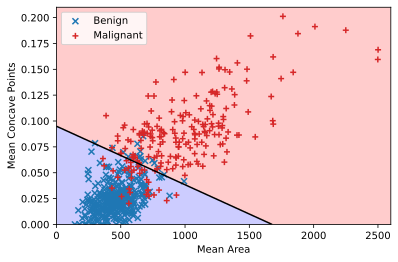

In [31]:
def plot_classification(theta):
    x_range = [0,2600]
    y_range = [0, 0.21]

    # plot classifcation regions
    grid=200
    xx,yy = np.meshgrid(np.linspace(x_range[0], x_range[1], grid),
                        np.linspace(y_range[0], y_range[1], grid))
    
    X_ = np.array([np.ravel(xx), np.ravel(yy), np.ones(xx.size)]).T

    # Zonas negativas y positivas
    zz = (X_ @ theta).reshape(grid,grid)
    cs = plt.contourf(xx,yy,zz, levels=[-100.0,0,100.0],alpha=0.2,colors=["b","r"])
    plt.contour(cs, colors='k')

    s1 = plt.scatter(dat["data"][:,ix][dat["target"]==1], dat["data"][:,iy][dat["target"]==1], marker='x', color='C0')
    s2 = plt.scatter(dat["data"][:,ix][dat["target"]==0], dat["data"][:,iy][dat["target"]==0], marker='+', color='C3')
    plt.xlim([0,2600])
    plt.ylim([0,0.21])
    plt.xlabel("Mean Area")
    plt.ylabel("Mean Concave Points")
    plt.legend([s1,s2], ['Benign', 'Malignant'])
plot_classification(theta)

### Pruebas de convergencia

Ejecutar el algoritmo SVM para 10, 100, 1000 y 10000 iteraciones. Graficar los resultados para ver como se ajusta la recta que discrimina los datos de etiquetas positivas y negativas.

In [ ]:
# 1 iteracion
#plot_classification(svm_gd(X, y, 1, 1, 1e-3))

In [ ]:
# 10 iteraciones

In [ ]:
# 100 iteraciones

In [ ]:
# 1000 iteraciones

In [ ]:
# 10000 iteraciones

## Graficar la pérdida (_loss_) y la tasa de acierto

Graficar los resultados obtenidos al ejecutar el algoritmo svm lineal con 1000 iteraciones. Por cada iteración graficar la pérdida y error obtenido por el algoritmo.

In [ ]:
# Gráfico pérdida

In [ ]:
# Gŕafico tasa de acierto

## Implementar SVM utilizando sklearn

**Pregunta para el alumno:** Repita los mismos experimentos utilizando las librerías Sklearn. ¿Se obtienen los mismos resultados?

**Respuesta del alumno**:

...

...

...

### Normalizar los datos

### Entrenar SVM con sklearn


### Visualizar los datos separados por SVM

###Graficar la pérdida (_loss_) y la tasa de acierto
